# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [5]:

import datetime
from scipy.stats import pearsonr

In [6]:

# Read and check the data from csv file

raw_data  = pd.read_csv("day.csv")
raw_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data_import_shape = raw_data.shape
data_import_shape

(730, 16)

In [8]:
raw_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [9]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
def bar_graph_plot_function(data, graph_title, x_axis_label, y_axis_label, data_label='horizontal', x_label_rotation=0, x_text=None):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)       
    if x_text is None:
        population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    else:
        population_graph.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [11]:
raw_data.dteday.describe()

count            730
unique           730
top       01-01-2018
freq               1
Name: dteday, dtype: object

# Data Preparation

We will check if any of the date range is outside certain limit

In [12]:

raw_data['dteday'].apply(lambda x: int(x.split('-')[0])).describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: dteday, dtype: float64

In [13]:
# We will check if any of the month range is outside certain limit
raw_data['dteday'].apply(lambda x: int(x.split('-')[1])).describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: dteday, dtype: float64

In [14]:
# We will check if any of the year range is outside certain limit
raw_data['dteday'].apply(lambda x: int(x.split('-')[2])).describe()

count     730.000000
mean     2018.500000
std         0.500343
min      2018.000000
25%      2018.000000
50%      2018.500000
75%      2019.000000
max      2019.000000
Name: dteday, dtype: float64

In [15]:

raw_data['dteday'] = raw_data['dteday'].apply(lambda x: int(x.split('-')[0]))

In [16]:
raw_data = raw_data.rename(columns={"dteday": "date"})

In [17]:

date_dist = round(raw_data.groupby(by='date').cnt.mean()/1000, 2)

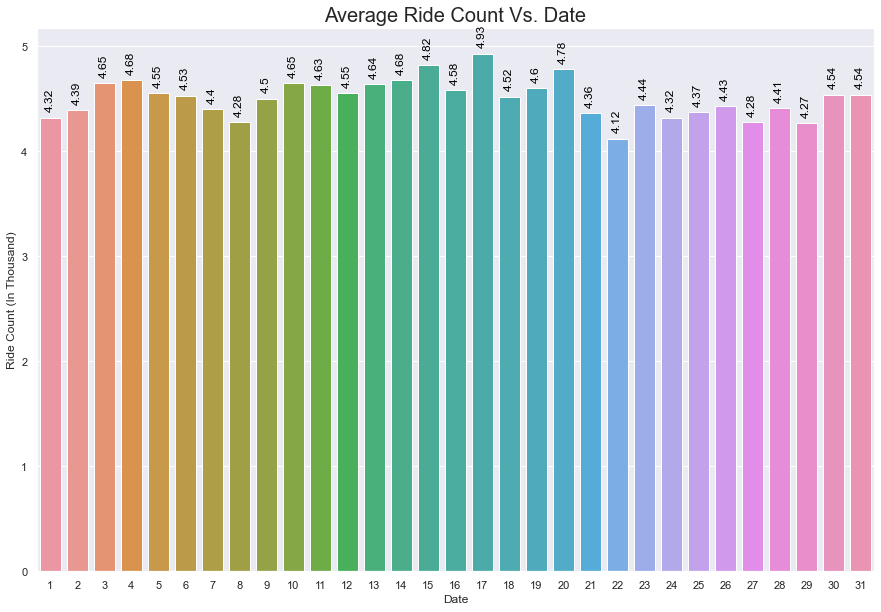

In [18]:
bar_graph_plot_function(data=date_dist, graph_title='Average Ride Count Vs. Date', x_axis_label='Date',
                        y_axis_label='Ride Count (In Thousand)', data_label='vertical', x_label_rotation=0)

By simply visualising the Date Column, we dont se any significant impact of this on Ride Count

We need to map these numbers to respectie seasons, so that these column values will be further used to generate dummy variable as it is a Categorical Nominal Type Data
We should map this column as follows:
1: spring
2: summer
3: fall
4: winter

In [19]:

raw_data.season.describe()

count    730.000000
mean       2.498630
std        1.110184
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: season, dtype: float64

In [20]:

raw_data['season'] = raw_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

In [21]:
season_dist = raw_data.groupby(by='season').cnt.mean().sort_values()

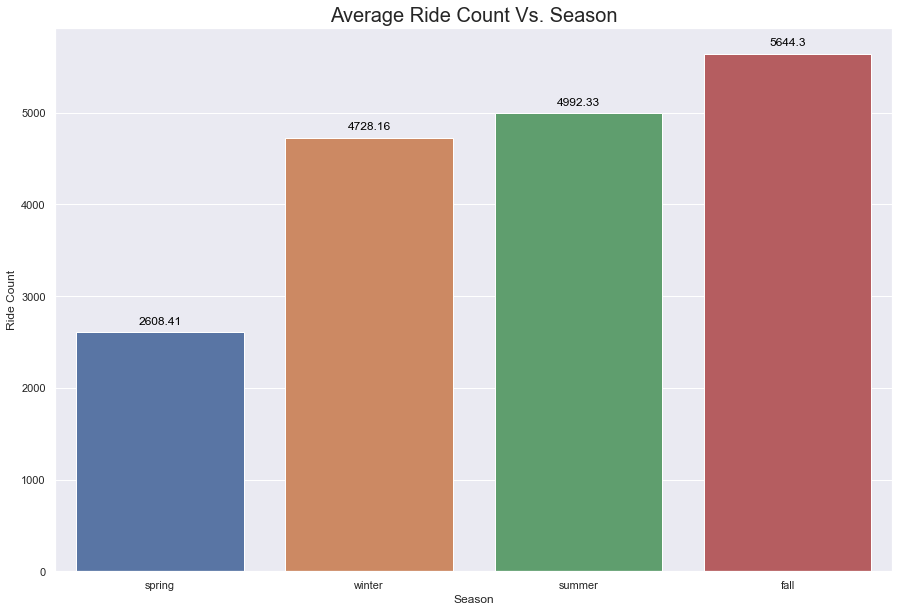

In [22]:

bar_graph_plot_function(data=season_dist, graph_title='Average Ride Count Vs. Season', x_axis_label='Season',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

We see that, distribution is quite different for respective seasons. This might act as a decisive factor

In [23]:

raw_data.yr.describe()

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: yr, dtype: float64

In [24]:

year_dist = raw_data.groupby(by='yr').cnt.mean()

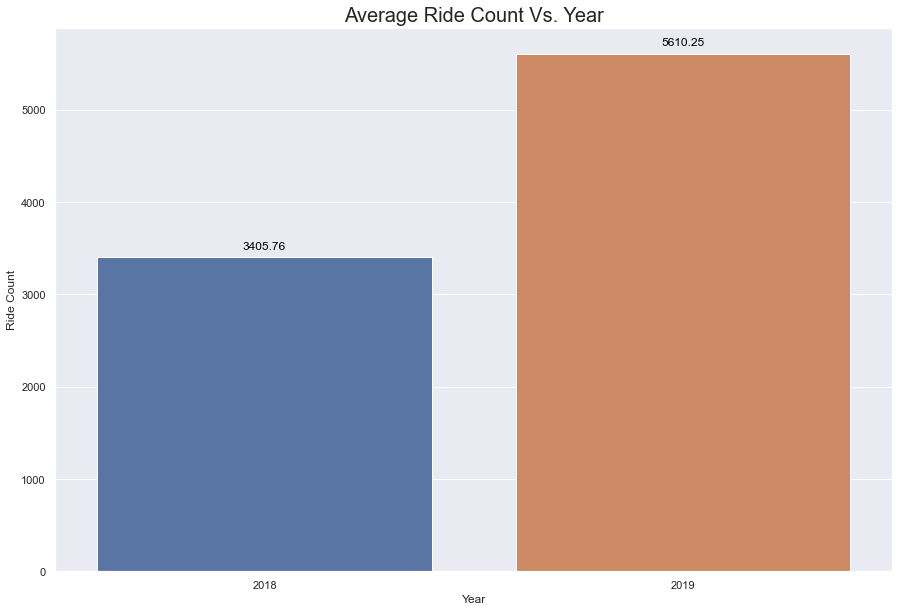

In [25]:
bar_graph_plot_function(data=year_dist, graph_title='Average Ride Count Vs. Year', x_axis_label='Year',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0,
                        x_text=['2018', '2019'])

We see that, Ride Count has increases comparatively in 2019 as compared to 2018. This can also be decisive factor for predicting target (output)

In [26]:

raw_data.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

Month column is varied between 1 and 12 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records
Let's plot distrubution of Ride Count Mean Across all the months

In [27]:

month_dist = raw_data.groupby(by='mnth').cnt.mean()

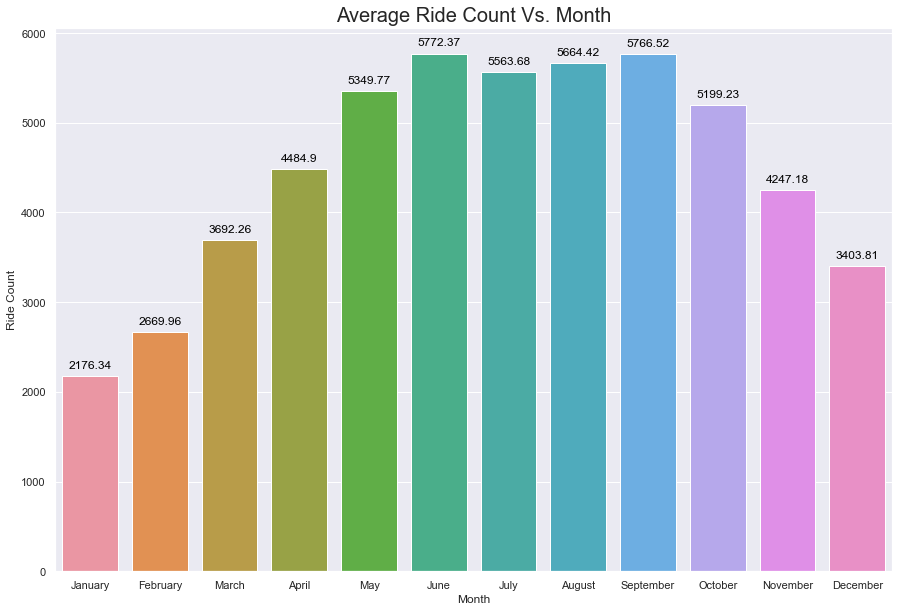

In [28]:

bar_graph_plot_function(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

We see that number of Ride Count drastically increases between May to October which are comparatively Summer & Fall Season in US
Month column is categorical column with each value corresponding to specific month.
Mapping numbers to respective Month Name

In [29]:

raw_data.mnth = raw_data.mnth.apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [30]:

raw_data.holiday.describe()

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: holiday, dtype: float64

Holiday column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records
Let's plot distrubution of Ride Count Mean Across the days which are counted either as holidays or working day

In [31]:

holiday_dist = raw_data.groupby(by='holiday').cnt.mean()

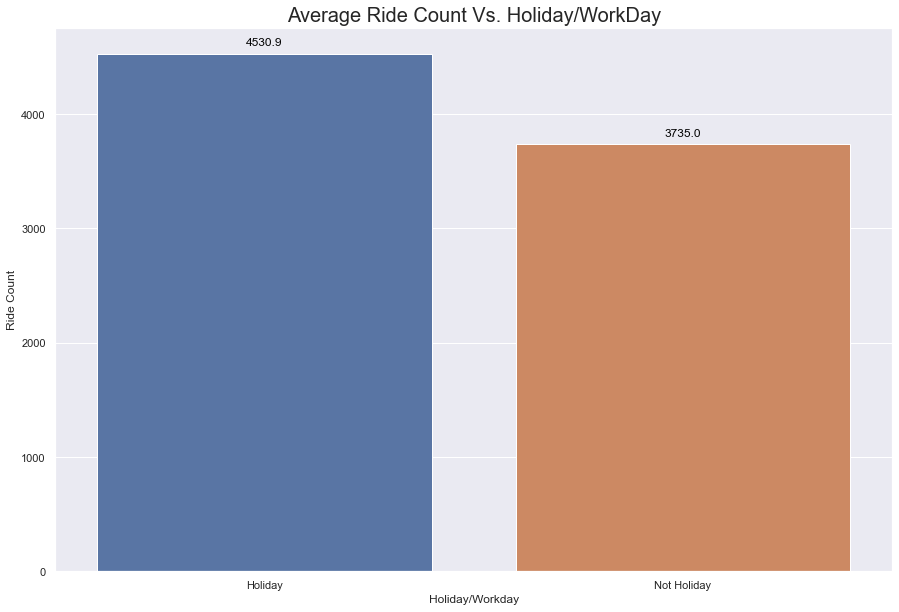

In [32]:

bar_graph_plot_function(data=holiday_dist, graph_title='Average Ride Count Vs. Holiday/WorkDay', x_axis_label='Holiday/Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Holiday', 'Not Holiday'])

Holiday is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
So, we will leave this as it is.

In [33]:
raw_data.weekday.describe()

count    730.000000
mean       2.997260
std        2.006161
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        6.000000
Name: weekday, dtype: float64

Weekday column is varied between 1 and 6 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [34]:

raw_data.groupby(by='weekday').weekday.count()

weekday
0    105
1    105
2    104
3    103
4    104
5    104
6    105
Name: weekday, dtype: int64

Let's plot distrubution of Ride Count Mean Across the days of weeks (Ex. Sunday, Monday etc.)

In [35]:

weekday_dist = raw_data.groupby(by='weekday').cnt.mean()

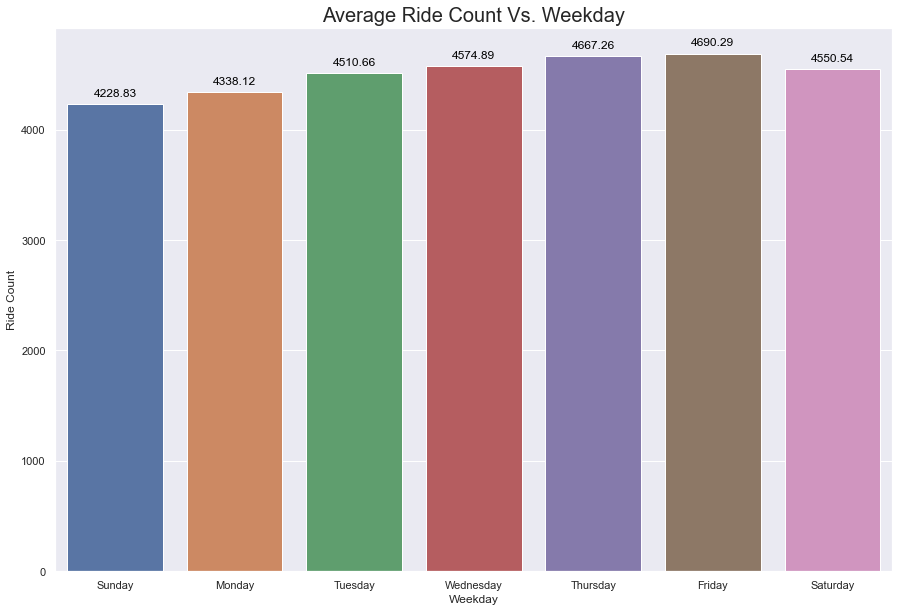

In [36]:

bar_graph_plot_function(data=weekday_dist, graph_title='Average Ride Count Vs. Weekday', x_axis_label='Weekday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

As per United States, it is usually considered that 1st day of week is Sunday.
And also from "Working Day Column", we can see that "Working Day" is marked as "1" for values of 1, 2, 3, 4, 5 in "Week day"
From this we can infer that, for weekday column, Sunday is mapped to 0, Monday is mapped to 1 and so on

In [37]:
raw_data['weekday'] = raw_data.weekday.map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})

In [38]:

raw_data.groupby(by='weekday').weekday.count()

weekday
friday       104
monday       105
saturday     105
sunday       105
thursday     104
tuesday      104
wednesday    103
Name: weekday, dtype: int64

In [39]:

raw_data.workingday.describe()

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: workingday, dtype: float64

Working Day column is varied between 0 and 1 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [40]:
raw_data.groupby(by='workingday').workingday.count()

workingday
0    231
1    499
Name: workingday, dtype: int64

Working Day is a Categorical Nomimal Variable. But there are only 2 values, "Yes" or "No" mapped to "1" & "0" respectively.
So, we will leave this as it is.
Let's plot distrubution of Ride Count Mean Across the days which are working days or not

In [41]:

workingday_dist = raw_data.groupby(by='workingday').cnt.mean()

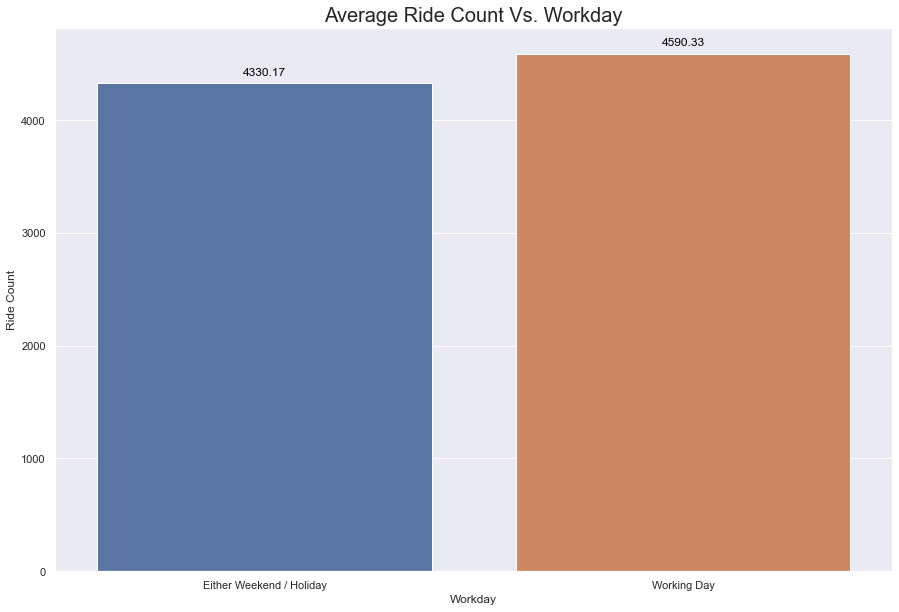

In [42]:
bar_graph_plot_function(data=workingday_dist, graph_title='Average Ride Count Vs. Workday', x_axis_label='Workday',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0, 
                        x_text=['Either Weekend / Holiday', 'Working Day'])

In [43]:

raw_data.weathersit.describe()

count    730.000000
mean       1.394521
std        0.544807
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: weathersit, dtype: float64

Weather Situation column is varied between 1 to 3 which are properly defined in data dictionary, hence we can proceed ahead with this column without dropping / changing any records

In [44]:

raw_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog #### As per the explanation, we will map each number with a shorter version
1: clear
2: mist
3: light

In [45]:

raw_data['weathersit'] = raw_data.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})

In [46]:

raw_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

In [47]:

weathersit_dist = raw_data.groupby(by='weathersit').cnt.mean()

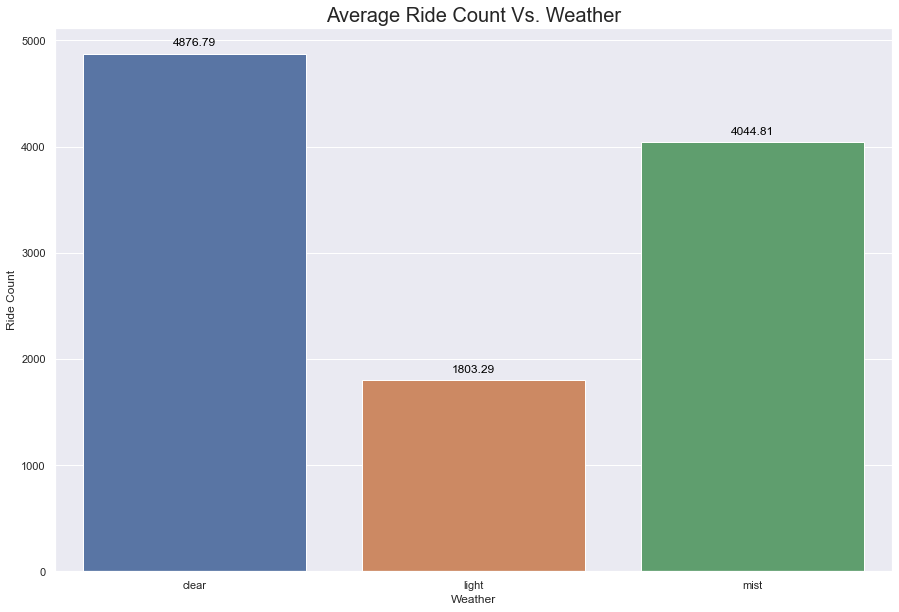

In [48]:

bar_graph_plot_function(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count', data_label='horizontal', x_label_rotation=0)

We see that there is high correlation that appears between Temperature & Adjusted Temperature by just visualising the columns

In [49]:
headers = ['Temperature', 'Adjusted Temperature']
pd.DataFrame(np.corrcoef(raw_data['temp'], raw_data["atemp"]), index=headers, columns=headers)    

,Temperature,Adjusted Temperature
Temperature,1.000000,0.991696
Adjusted Temperature,0.991696,1.000000


We will go ahead and drop "Adjusted Temperature" column as any one can be dropped since they are highly correlated and provide almost same explanation

In [50]:

raw_data = raw_data.drop(columns=['atemp'])

In [51]:

raw_data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

Text(0.5, 0, 'Temperature')

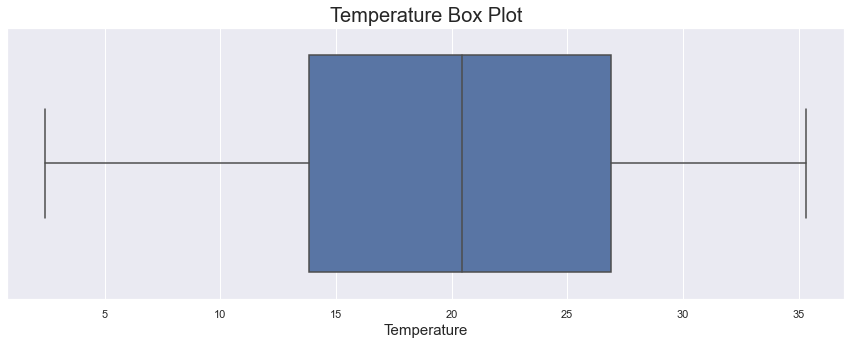

In [52]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='temp')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

Temperature column is varied between a range which seems to be valid range, hence we can proceed ahead with this column without dropping / changing any records.

# Humidity Column

In [53]:

raw_data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Humidity')

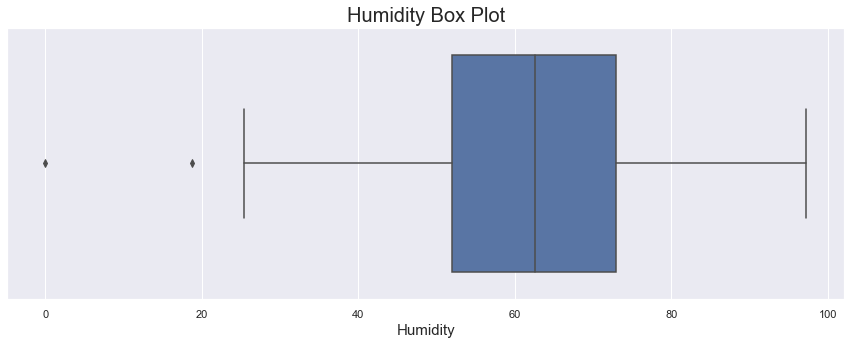

In [54]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=raw_data, x='hum')
plt.title('Humidity Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Humidity', fontdict={'fontsize': 15})

In [55]:

raw_data[raw_data['hum'] == 0]

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
68,69,10,spring,0,March,0,thursday,1,light,15.952731,0.0,17.545759,46,577,623


To check if this a typo or invalid data from source, we will pick 20% of values prior to specific date & 20% of values after the specific date and generate a plot to check the behaviour

In [56]:
humidity_check_df = raw_data[(raw_data.index > int(69*0.8)) & (raw_data.index < int(69*1.2))]
humidity_check_df

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
56,57,26,spring,0,February,0,saturday,0,clear,11.582500,53.7917,12.500257,424,1545,1969
57,58,27,spring,0,February,0,sunday,0,clear,14.082598,68.0000,8.391616,694,1708,2402
58,59,28,spring,0,February,0,monday,1,mist,16.698193,87.6364,19.408962,81,1365,1446
59,60,1,spring,0,March,0,tuesday,1,clear,10.933347,53.5000,14.500475,137,1714,1851
60,61,2,spring,0,March,0,wednesday,1,clear,13.735000,44.9583,20.624811,231,1903,2134
61,62,3,spring,0,March,0,thursday,1,clear,8.131653,31.8333,15.125518,123,1562,1685
62,63,4,spring,0,March,0,friday,1,mist,10.728347,61.0417,13.624182,214,1730,1944
63,64,5,spring,0,March,0,saturday,0,mist,15.750847,78.9167,16.875357,640,1437,2077
64,65,6,spring,0,March,0,sunday,0,mist,15.437402,94.8261,23.000229,114,491,605
65,66,7,spring,0,March,0,monday,1,clear,10.731299,55.1304,22.870584,244,1628,1872


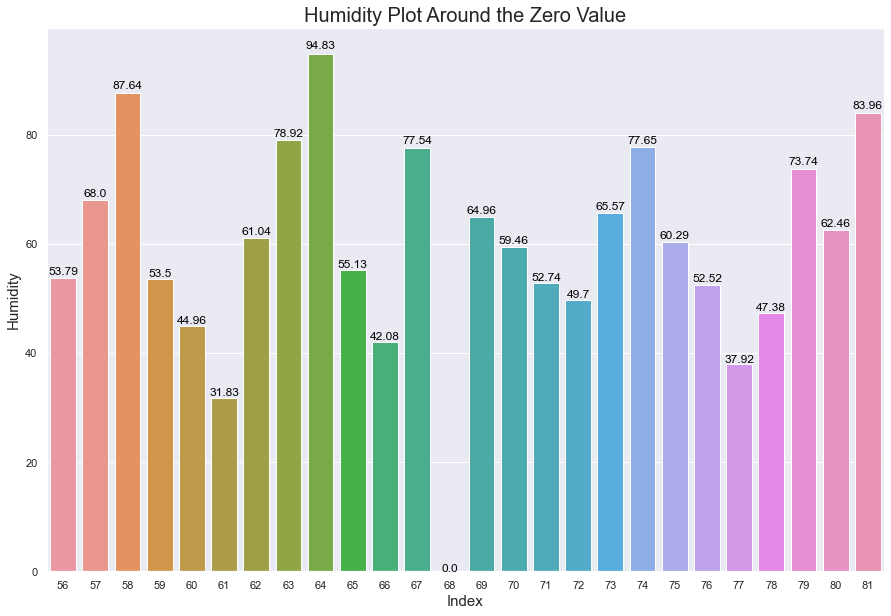

In [57]:
graph = sns.barplot(y=humidity_check_df.hum, x=humidity_check_df.index)
plt.title('Humidity Plot Around the Zero Value', fontdict={'fontsize': 20})
plt.xlabel('Index', fontdict={'fontsize': 15})
plt.ylabel('Humidity', fontdict={'fontsize': 15})
counter = 0
for index, row in humidity_check_df.iterrows():
    graph.text(counter, row.hum*1.01, round(row.hum, 2), color='black', ha="center")
    counter+=1
plt.show()

From the above graph we can say that, the value of humidity as 0 should be adjusted as humidity if 0 is practically impossible. This could have been possible during recording the data if not done properly.
This can be done by taking numerical mean of all the records before and after this value upto a specifc range making to make sure there is no abrupt change in the season that will again deem oour redicted value to be wrong.
Imputing the mean value at the zero humidity level

In [58]:
mean_value = humidity_check_df.hum.mean()
mean_value

59.137907692307685

In [59]:

raw_data.at[int(raw_data[raw_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [60]:

raw_data[raw_data.hum < 10]

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt


In [61]:
humidity_check_post_df = raw_data[(raw_data.index > int(69*0.8)) & (raw_data.index < int(69*1.2))]
humidity_check_post_df

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
56,57,26,spring,0,February,0,saturday,0,clear,11.582500,53.791700,12.500257,424,1545,1969
57,58,27,spring,0,February,0,sunday,0,clear,14.082598,68.000000,8.391616,694,1708,2402
58,59,28,spring,0,February,0,monday,1,mist,16.698193,87.636400,19.408962,81,1365,1446
59,60,1,spring,0,March,0,tuesday,1,clear,10.933347,53.500000,14.500475,137,1714,1851
60,61,2,spring,0,March,0,wednesday,1,clear,13.735000,44.958300,20.624811,231,1903,2134
61,62,3,spring,0,March,0,thursday,1,clear,8.131653,31.833300,15.125518,123,1562,1685
62,63,4,spring,0,March,0,friday,1,mist,10.728347,61.041700,13.624182,214,1730,1944
63,64,5,spring,0,March,0,saturday,0,mist,15.750847,78.916700,16.875357,640,1437,2077
64,65,6,spring,0,March,0,sunday,0,mist,15.437402,94.826100,23.000229,114,491,605
65,66,7,spring,0,March,0,monday,1,clear,10.731299,55.130400,22.870584,244,1628,1872


So, we have adjusted the zero (or missing) value of Humidity successfully.

# Windspeed Column

In [62]:

raw_data.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

Wind speed seems to be in legitimate range, hence we can proceed ahead with this column without dropping / changing any records

 # Casual, Registered Count & Total Count

Our aim for this assignment is to predict the final count (irrespective of casual & registered count)
As these columns are not required, we will go ahead dropping these.

In [63]:
raw_data = raw_data.drop(columns=['casual', 'registered'])

# Data Visualization


In [64]:
pair_plot_data =  pd.read_csv("day.csv")

In [65]:
pair_plot_data['dteday'] = pair_plot_data['dteday'].apply(lambda x: int(x.split('-')[0]))
pair_plot_data = pair_plot_data.rename(columns={"dteday": "date"})
pair_plot_data['yr'] = pair_plot_data['yr'].map({0: 2018, 1:2019})
pair_plot_data = pair_plot_data.drop(columns=['atemp', 'casual', 'registered'])
pair_plot_data.at[int(pair_plot_data[pair_plot_data['hum'] == 0.0].hum.index.values), "hum"] = mean_value

In [66]:

pair_plot_data.head(10)

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,1,2018,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,2,2,1,2018,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,3,3,1,2018,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,4,4,1,2018,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,5,5,1,2018,1,0,3,1,1,9.305237,43.6957,12.522300,1600
5,6,6,1,2018,1,0,4,1,1,8.378268,51.8261,6.000868,1606
6,7,7,1,2018,1,0,5,1,2,8.057402,49.8696,11.304642,1510
7,8,8,1,2018,1,0,6,0,2,6.765000,53.5833,17.875868,959
8,9,9,1,2018,1,0,0,0,1,5.671653,43.4167,24.250650,822
9,10,10,1,2018,1,0,1,1,1,6.184153,48.2917,14.958889,1321


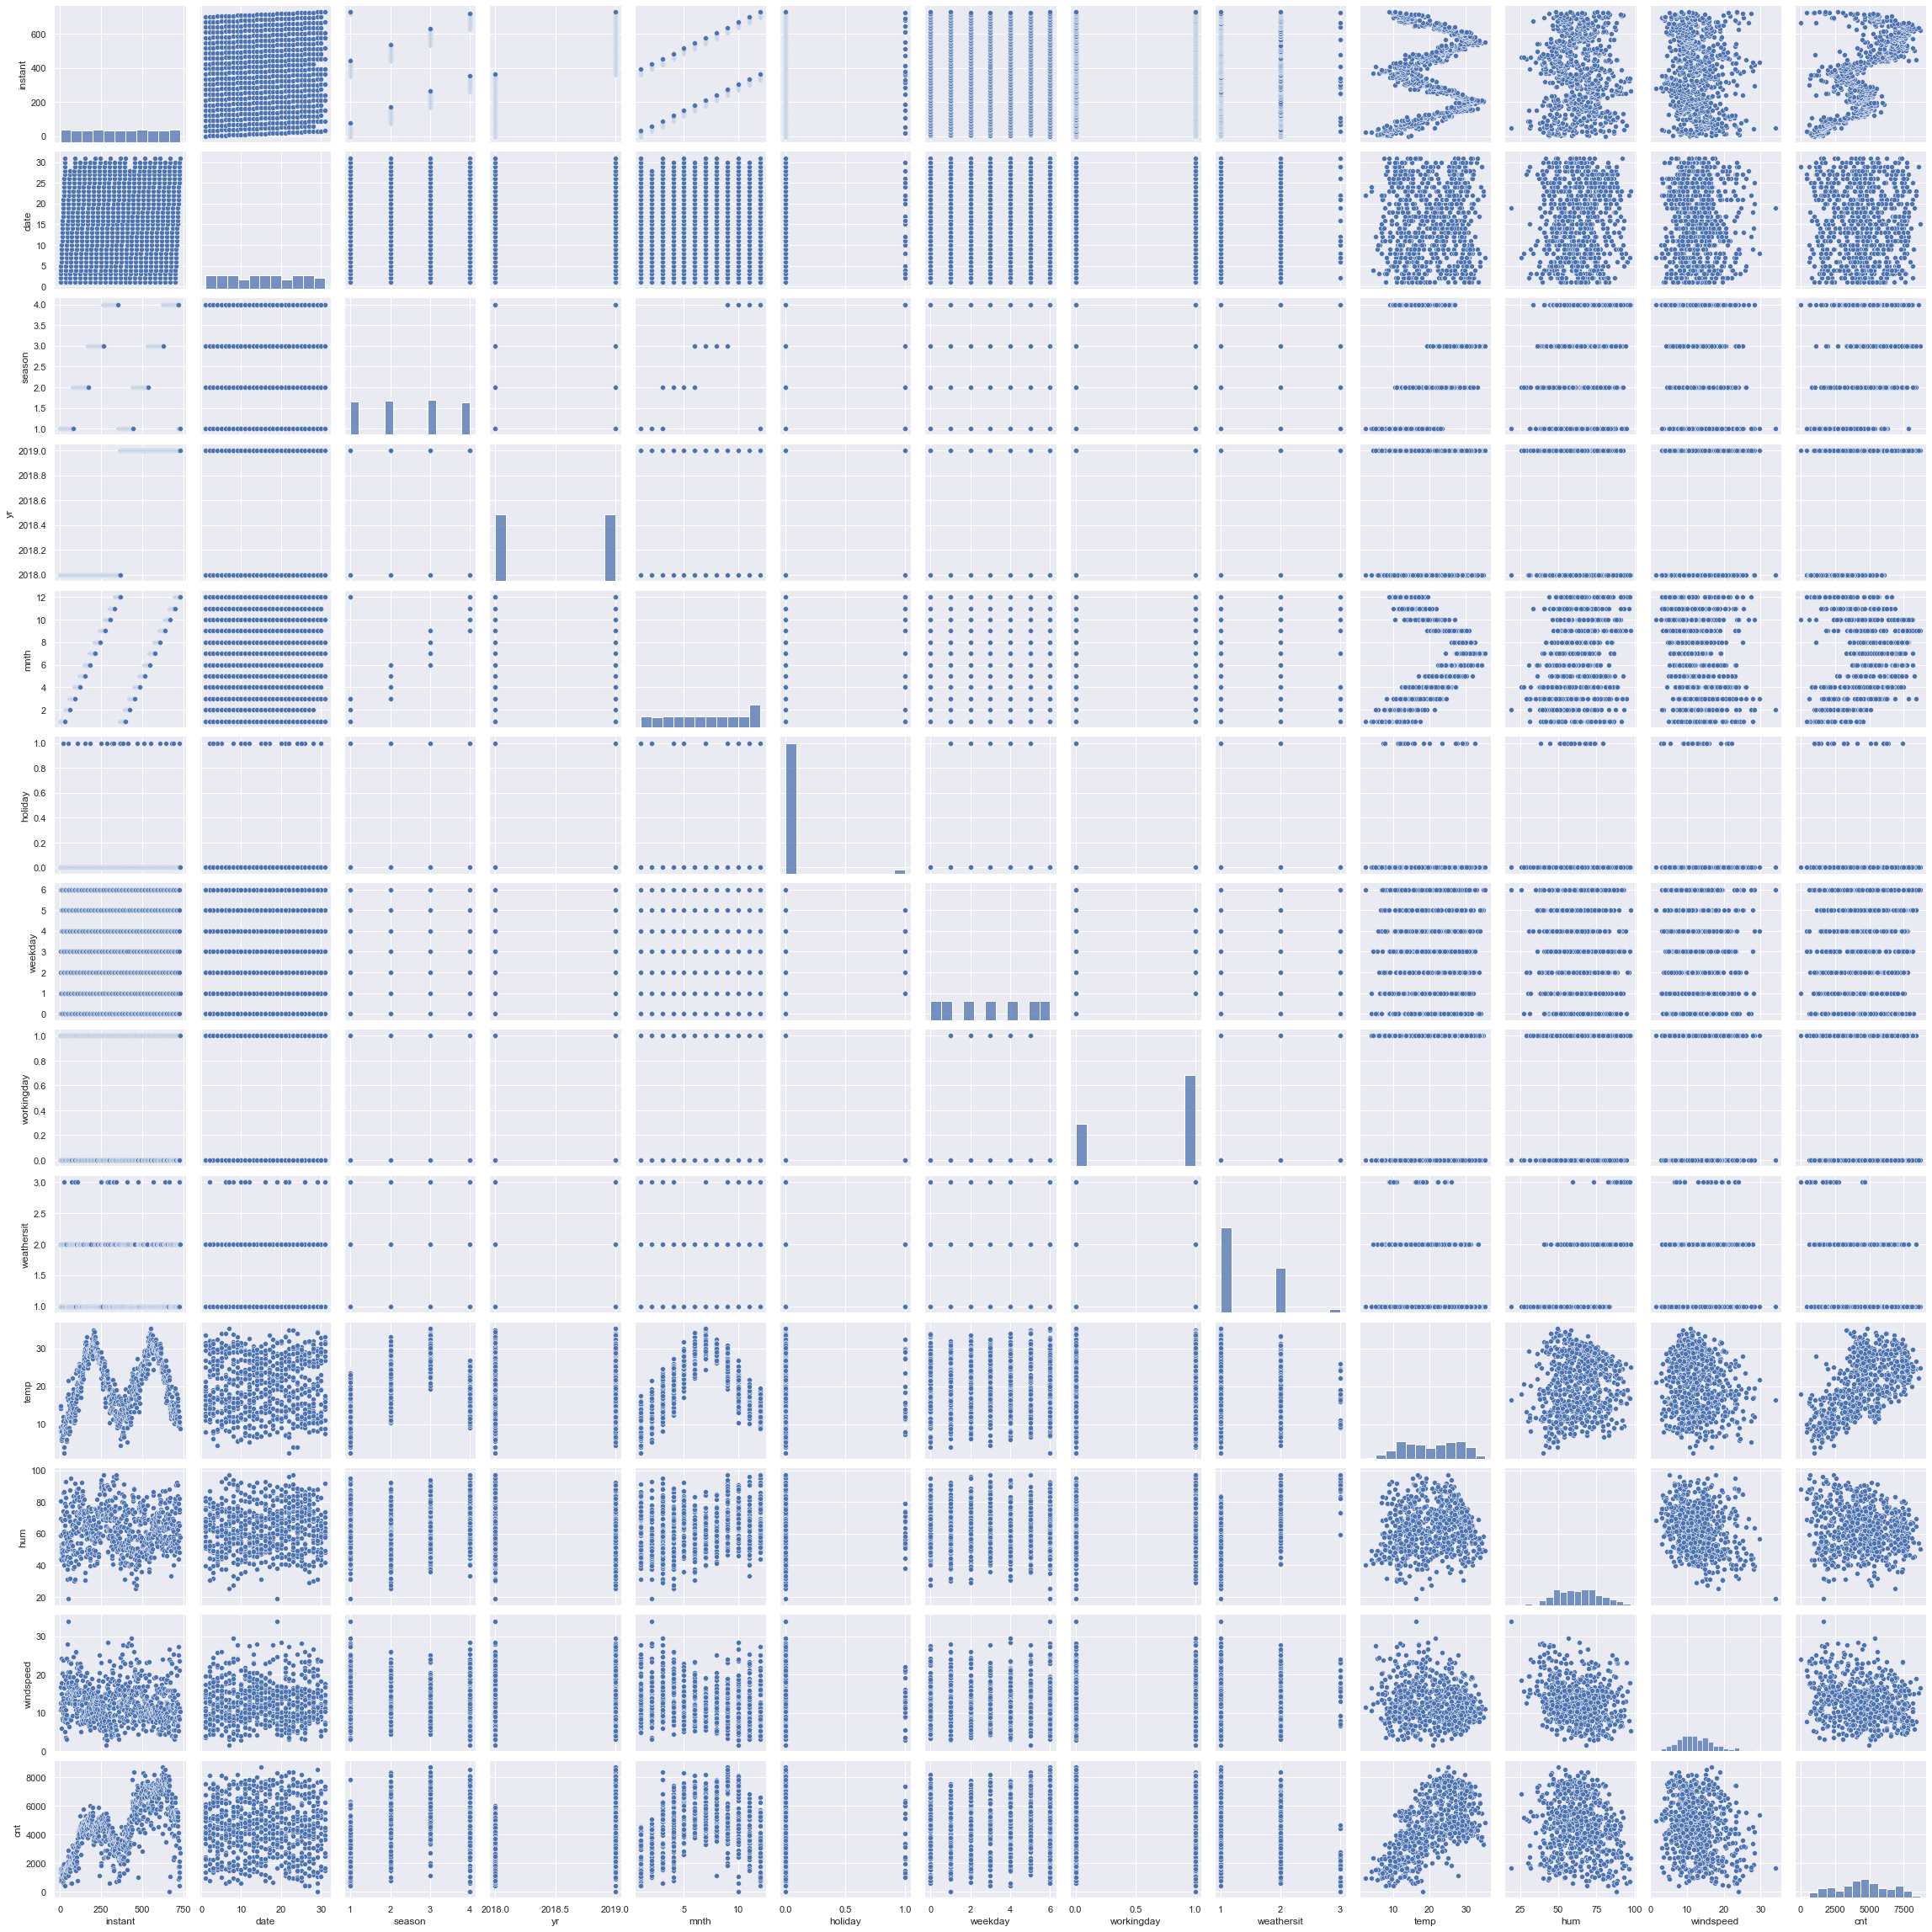

In [67]:
sns.pairplot(pair_plot_data)

Following are the few assumptions that can hold up from the pairplot with respect to Count as Target Variable:

Date Column seems to be scattered evenly across all the points. Unable to make out any pattern when predicting Ride Count from the Date column alone.

Ride Count Seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.

Ride Count has increased drastically in 2019 as compared to 2018

Ride Count seems to increase between May to October which are comparatively Fall(Autumn) & Summer Season in US
Ride Count is lesser on Holidays as compared to other days.

Working Day / Non-Working Day shows almost similar behaviour (after just visualising the data)

Ride Count is more on Clear & Misty Days as compared to Light Snow / Rainfall

Ride Count seems to be very much lienarly dependent on Temperature

Humidity & windspeed does not indicate any specific behaviour on just visualising the data.

In [68]:
raw_data.head()

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,1,spring,0,January,0,saturday,0,mist,14.110847,80.5833,10.749882,985
1,2,2,spring,0,January,0,sunday,0,mist,14.902598,69.6087,16.652113,801
2,3,3,spring,0,January,0,monday,1,clear,8.050924,43.7273,16.636703,1349
3,4,4,spring,0,January,0,tuesday,1,clear,8.200000,59.0435,10.739832,1562
4,5,5,spring,0,January,0,wednesday,1,clear,9.305237,43.6957,12.522300,1600


# Data Transformation 

In [69]:
dummy_variables_columns = ['mnth', 'season', 'weekday', 'weathersit']

In [70]:
status = pd.get_dummies(raw_data[dummy_variables_columns], drop_first=True)
status.head(10)

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [71]:

raw_data = pd.concat([raw_data, status], axis=1)

In [72]:

raw_data = raw_data.drop(columns=dummy_variables_columns)

# Data Splitting

In [73]:

df_train, df_test = train_test_split(raw_data, train_size=0.7, random_state=100)

In [74]:

df_train.shape

(510, 31)

In [75]:
df_test.shape

(220, 31)

# Data Transformation (Normalising)


In [76]:
# numerical variables
numerical_variables = ['date', 'temp', 'hum', 'windspeed', 'cnt']

In [77]:

scaler = MinMaxScaler()

In [78]:
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])
df_train.head(10)

,instant,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
576,577,1.000000,1,0,1,0.815169,0.659744,0.264686,0.827658,0,...,0,0,0,0,0,0,1,0,0,0
426,427,0.066667,1,0,0,0.442393,0.553780,0.255342,0.465255,0,...,0,0,0,1,0,0,0,0,0,1
728,729,0.966667,1,0,0,0.245101,0.377528,0.663106,0.204096,0,...,0,0,0,0,1,0,0,0,0,0
482,483,0.900000,1,0,0,0.395666,0.385516,0.188475,0.482973,0,...,1,0,0,1,0,0,0,0,0,1
111,112,0.700000,0,0,1,0.345824,0.692225,0.380981,0.191095,0,...,1,0,0,0,0,0,0,0,0,1
580,581,0.100000,1,0,0,0.914852,0.543663,0.462538,0.782559,1,...,0,0,0,1,0,0,0,0,0,0
500,501,0.500000,1,0,1,0.719639,0.651757,0.172431,0.851588,0,...,1,0,0,0,0,0,0,1,0,0
479,480,0.800000,1,0,1,0.520271,0.306709,0.164434,0.710308,0,...,1,0,0,0,0,0,0,1,0,0
472,473,0.566667,1,0,1,0.503656,0.487220,0.270032,0.499885,0,...,1,0,0,0,0,0,0,1,0,1
455,456,0.000000,1,0,0,0.456929,0.624068,0.279394,0.692476,0,...,1,0,0,0,1,0,0,0,0,1


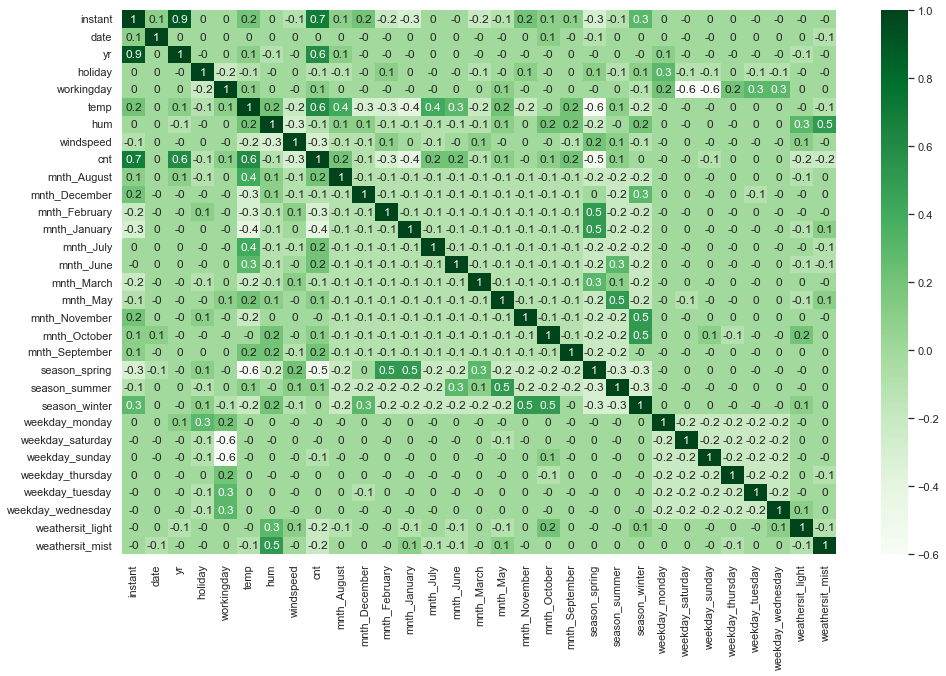

In [79]:
df_train.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(round(df_train.corr(), 1), annot=True, cmap='Greens')
plt.show()

In [80]:

y_train = df_train.pop('cnt')

In [81]:

X_train = df_train

In [82]:
def calculate_vif(local_df):
    vif_df = pd.DataFrame()
    vif_df['Features'] = local_df.columns
    vif_df['VIF'] = [variance_inflation_factor(local_df.values, i) for i in range(local_df.shape[1])]
    vif_df['VIF'] = round(vif_df['VIF'], 2)
    vif_df = vif_df.sort_values(by='VIF', ascending=False)
    vif_df = vif_df.reset_index(drop=True)
    return vif_df

# RFE (Recursive Feature Elimination) Application

In [83]:

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [84]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
29,weathersit_mist,True,1
21,season_winter,True,1
20,season_summer,True,1
19,season_spring,True,1
18,mnth_September,True,1
28,weathersit_light,True,1
12,mnth_July,True,1
11,mnth_January,True,1
6,hum,True,1
5,temp,True,1


# Model Building Process -1

In [85]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.1
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.80e-191
Time:                        19:51:01   Log-Likelihood:                 519.76
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -939.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2238      0.033      6.752      0.000       0.159       0.289
yr                   0.2300      0.008     28.672      0.000       0.214       0.246
holiday             -0.0583      0.027     -2.169      0.031      -0.111      -0.005
workingday           0.0433      0.012      3.759      0.000       0.021       0.066
temp                 0.5138      0.035     14.851      0.000       0.446       0.582
hum                 -0.1350      0.032     -4.215      0.000      -0.198      -0.072
windspeed           -0.1885      0.026     -7.358      0.000      -0.239      -0.138
mnth_January        -0.0351      0.017     -2.025      0.043      -0.069      -0.001
mnth_July           -0.0535      0.018     -2.961      0.003      -0.089      -0.018
mnth_September       0.0816      0.016      4.959      0.000       0.049       0.114
season_spring       -0.0484      0.021     -2.336      0.020      -0.089      -0.008
season_summer        0.0515      0.015      3.467      0.001       0.022       0.081
season_winter        0.0945      0.017      5.456      0.000       0.060       0.129
weekday_saturday     0.0530      0.015      3.657      0.000       0.025       0.082
weathersit_light    -0.2374      0.027     -8.785      0.000      -0.291      -0.184
weathersit_mist     -0.0545      0.011     -5.148      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.723   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.476
Skew:                          -0.684   Prob(JB):                     1.42e-35
Kurtosis:                       5.384   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
calculate_vif(X_train_rfe)

,Features,VIF
0,hum,20.48
1,temp,15.20
2,workingday,5.26
3,windspeed,4.86
4,season_spring,4.07
5,season_winter,3.04
6,season_summer,2.68
7,weathersit_mist,2.47
8,yr,2.10
9,weekday_saturday,1.97


# Model Building Process -2

In [87]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.60e-188
Time:                        19:51:01   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1737      0.031      5.520      0.000       0.112       0.235
yr                   0.2345      0.008     29.009      0.000       0.219       0.250
holiday             -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday           0.0464      0.012      3.966      0.000       0.023       0.069
temp                 0.4722      0.034     14.005      0.000       0.406       0.538
windspeed           -0.1563      0.025     -6.286      0.000      -0.205      -0.107
mnth_January        -0.0392      0.018     -2.227      0.026      -0.074      -0.005
mnth_July           -0.0479      0.018     -2.614      0.009      -0.084      -0.012
mnth_September       0.0755      0.017      4.527      0.000       0.043       0.108
season_spring       -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer        0.0445      0.015      2.967      0.003       0.015       0.074
season_winter        0.0784      0.017      4.562      0.000       0.045       0.112
weekday_saturday     0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_light    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_mist     -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
calculate_vif(X_train_rfe)

,Features,VIF
0,temp,7.07
1,workingday,5.24
2,windspeed,4.68
3,season_spring,3.07
4,season_summer,2.34
5,yr,2.08
6,season_winter,1.98
7,weekday_saturday,1.97
8,mnth_January,1.62
9,mnth_July,1.59


# Model Building Process -3

In [89]:
col = col.drop(['temp'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.44e-154
Time:                        19:51:01   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5444      0.020     27.118      0.000       0.505       0.584
yr                   0.2478      0.009     26.153      0.000       0.229       0.266
holiday             -0.0567      0.032     -1.757      0.080      -0.120       0.007
workingday           0.0478      0.014      3.466      0.001       0.021       0.075
windspeed           -0.1878      0.029     -6.426      0.000      -0.245      -0.130
mnth_January        -0.1026      0.020     -5.112      0.000      -0.142      -0.063
mnth_July           -0.0095      0.021     -0.446      0.656      -0.052       0.032
mnth_September       0.0710      0.020      3.610      0.000       0.032       0.110
season_spring       -0.2602      0.018    -14.483      0.000      -0.296      -0.225
season_summer       -0.0427      0.016     -2.651      0.008      -0.074      -0.011
season_winter       -0.0762      0.016     -4.903      0.000      -0.107      -0.046
weekday_saturday     0.0562      0.017      3.243      0.001       0.022       0.090
weathersit_light    -0.3034      0.029    -10.593      0.000      -0.360      -0.247
weathersit_mist     -0.0882      0.010     -8.688      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.639   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.598
Skew:                          -0.421   Prob(JB):                     3.46e-15
Kurtosis:                       4.557   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
calculate_vif(X_train_rfe)

,Features,VIF
0,windspeed,4.27
1,workingday,3.83
2,season_spring,2.97
3,season_summer,2.29
4,season_winter,1.98
5,yr,1.91
6,weekday_saturday,1.69
7,mnth_January,1.60
8,weathersit_mist,1.57
9,mnth_July,1.30


# Model Building Process -3

In [91]:
col = col.drop(['mnth_July'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          5.73e-155
Time:                        19:51:01   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5406      0.018     29.655      0.000       0.505       0.576
yr                   0.2478      0.009     26.179      0.000       0.229       0.266
holiday             -0.0563      0.032     -1.746      0.081      -0.120       0.007
workingday           0.0481      0.014      3.489      0.001       0.021       0.075
windspeed           -0.1877      0.029     -6.429      0.000      -0.245      -0.130
mnth_January        -0.1027      0.020     -5.118      0.000      -0.142      -0.063
mnth_September       0.0737      0.019      3.933      0.000       0.037       0.111
season_spring       -0.2568      0.016    -15.797      0.000      -0.289      -0.225
season_summer       -0.0393      0.014     -2.768      0.006      -0.067      -0.011
season_winter       -0.0730      0.014     -5.303      0.000      -0.100      -0.046
weekday_saturday     0.0564      0.017      3.254      0.001       0.022       0.090
weathersit_light    -0.3035      0.029    -10.606      0.000      -0.360      -0.247
weathersit_mist     -0.0879      0.010     -8.685      0.000      -0.108      -0.068
==============================================================================
Omnibus:                       34.767   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.525
Skew:                          -0.424   Prob(JB):                     3.58e-15
Kurtosis:                       4.553   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
calculate_vif(X_train_rfe)

,Features,VIF
0,windspeed,4.12
1,workingday,3.54
2,season_spring,2.68
3,season_summer,2.01
4,yr,1.89
5,season_winter,1.78
6,weekday_saturday,1.62
7,mnth_January,1.60
8,weathersit_mist,1.57
9,mnth_September,1.20


# Model Building Process -4

In [93]:
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          2.01e-155
Time:                        19:51:01   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5332      0.018     30.023      0.000       0.498       0.568
yr                   0.2480      0.009     26.146      0.000       0.229       0.267
workingday           0.0564      0.013      4.353      0.000       0.031       0.082
windspeed           -0.1887      0.029     -6.450      0.000      -0.246      -0.131
mnth_January        -0.1033      0.020     -5.138      0.000      -0.143      -0.064
mnth_September       0.0715      0.019      3.815      0.000       0.035       0.108
season_spring       -0.2581      0.016    -15.860      0.000      -0.290      -0.226
season_summer       -0.0394      0.014     -2.768      0.006      -0.067      -0.011
season_winter       -0.0743      0.014     -5.392      0.000      -0.101      -0.047
weekday_saturday     0.0648      0.017      3.887      0.000       0.032       0.098
weathersit_light    -0.3023      0.029    -10.546      0.000      -0.359      -0.246
weathersit_mist     -0.0874      0.010     -8.623      0.000      -0.107      -0.067
==============================================================================
Omnibus:                       39.401   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.660
Skew:                          -0.459   Prob(JB):                     5.04e-18
Kurtosis:                       4.705   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [94]:
calculate_vif(X_train_rfe)

,Features,VIF
0,windspeed,4.04
1,workingday,3.29
2,season_spring,2.65
3,season_summer,2.00
4,yr,1.88
5,season_winter,1.73
6,mnth_January,1.60
7,weathersit_mist,1.57
8,weekday_saturday,1.56
9,mnth_September,1.18


## From the above model we find that p-values and VIF are under control so we can fix the model with these variable features for prediction and let see

# Proof for Linear Regression Assumptions

## Assumption of Normally Distributed Error Terms
After building model, we cannot finalise untill we proove the residual analysis wherein we check whether the distribution of Error is around 0 or not.

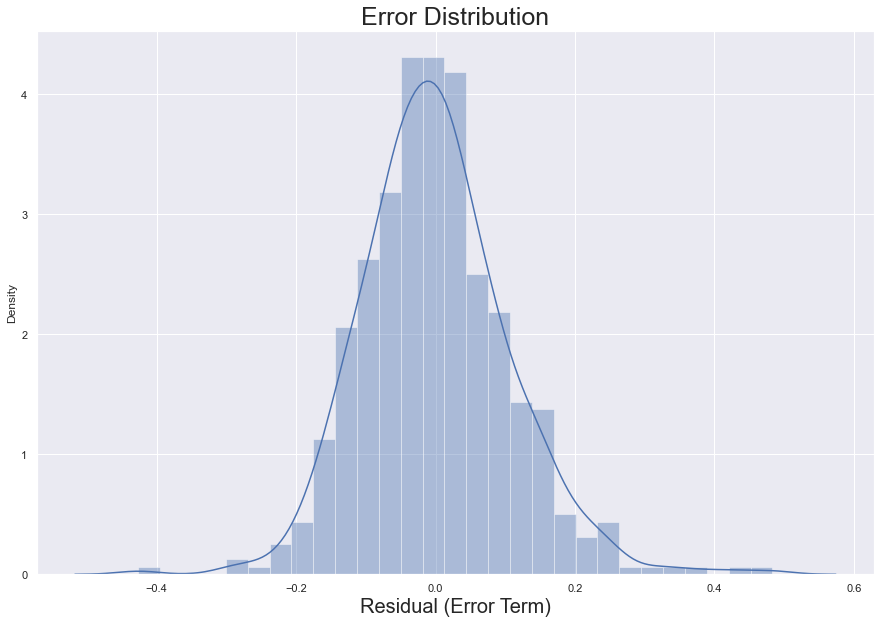

In [95]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train_pred - y_train
sns.distplot(residual)
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 20})
plt.title('Error Distribution', fontdict={'fontsize': 25})
plt.show()

Note: From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly.

# Assumption of Error Terms Being Independent

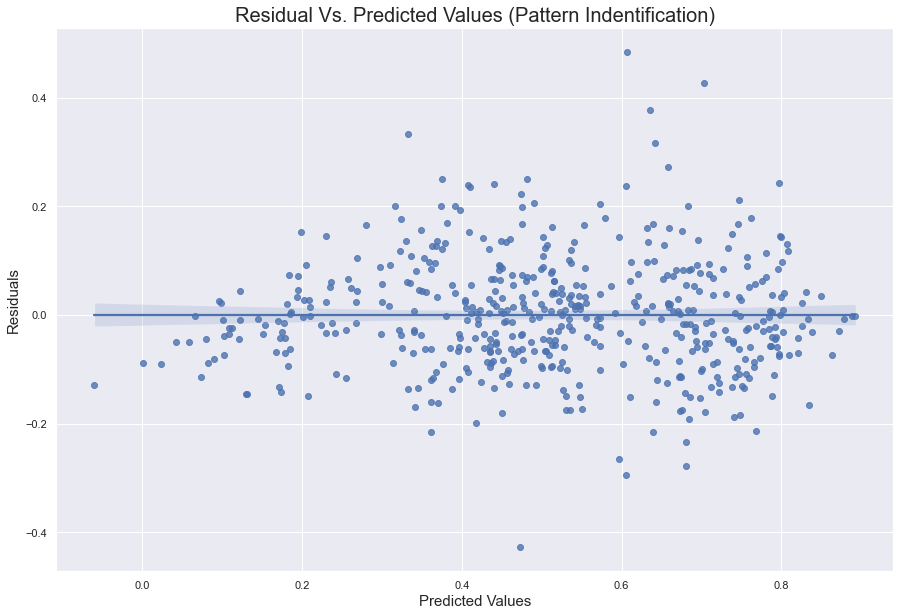

In [96]:
sns.regplot(x=y_train_pred, y=residual)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

# Homoscedasticity

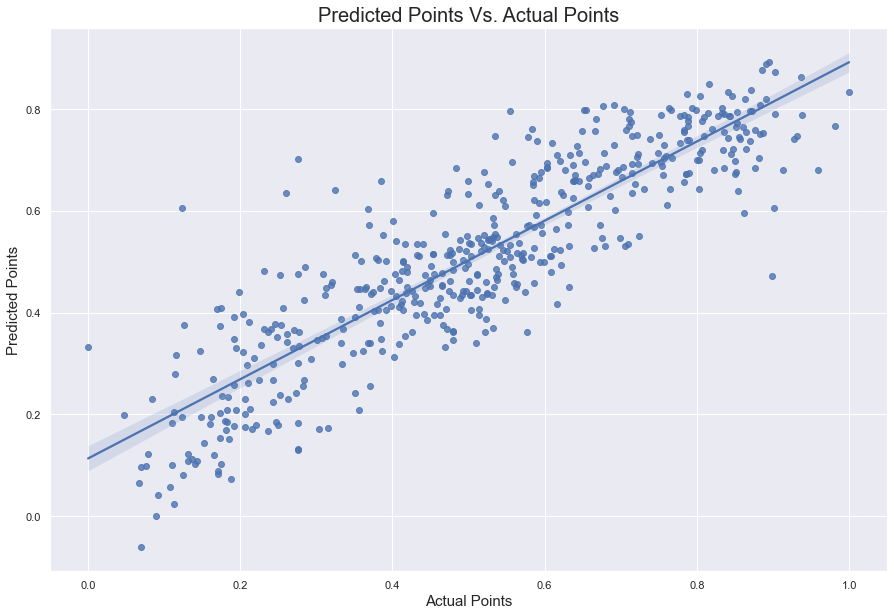

In [97]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value.
This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.
This prooves Homoscedasticity of Error Terms

 # Multicorrelation

This asumption is already taken care of while building model by calculating VIF of evry predictor. Following is the final VIF value of all the predictors used in the model

In [98]:
calculate_vif(X_train_rfe)

,Features,VIF
0,windspeed,4.04
1,workingday,3.29
2,season_spring,2.65
3,season_summer,2.00
4,yr,1.88
5,season_winter,1.73
6,mnth_January,1.60
7,weathersit_mist,1.57
8,weekday_saturday,1.56
9,mnth_September,1.18


# Predicting on Test Data

In [99]:
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])
df_test.head(10)

,instant,date,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,...,season_summer,season_winter,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light,weathersit_mist
184,185,0.100000,0,1,0,0.831783,0.575080,0.084219,0.692706,0,...,0,0,1,0,0,0,0,0,0,1
535,536,0.633333,1,0,1,0.901354,0.516506,0.153728,0.712034,0,...,1,0,0,0,0,0,0,1,0,0
299,300,0.866667,0,0,1,0.511964,0.798722,0.334206,0.303382,0,...,0,1,0,0,0,1,0,0,0,1
221,222,0.300000,0,0,1,0.881625,0.301917,0.339570,0.547400,1,...,0,0,0,0,0,0,0,1,0,0
152,153,0.033333,0,0,1,0.817246,0.149627,0.537414,0.569029,0,...,1,0,0,0,0,1,0,0,0,0
404,405,0.266667,1,0,1,0.256524,0.478167,0.326196,0.438104,0,...,0,0,0,0,0,1,0,0,0,0
198,199,0.566667,0,0,1,0.856704,0.592119,0.372990,0.510354,0,...,0,0,1,0,0,0,0,0,0,0
171,172,0.666667,0,0,1,0.774672,0.744409,0.276724,0.553728,0,...,0,0,0,0,0,0,1,0,0,1
512,513,0.900000,1,1,0,0.814131,0.624068,0.331536,0.692706,0,...,1,0,1,0,0,0,0,0,0,0
200,201,0.633333,0,0,1,0.883701,0.663471,0.153738,0.495858,0,...,0,0,0,0,0,0,0,1,0,0


In [100]:

y_test = df_test.pop('cnt')

In [101]:

X_test = df_test

In [102]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [103]:
y_test_pred = lr_model.predict(X_test_new)

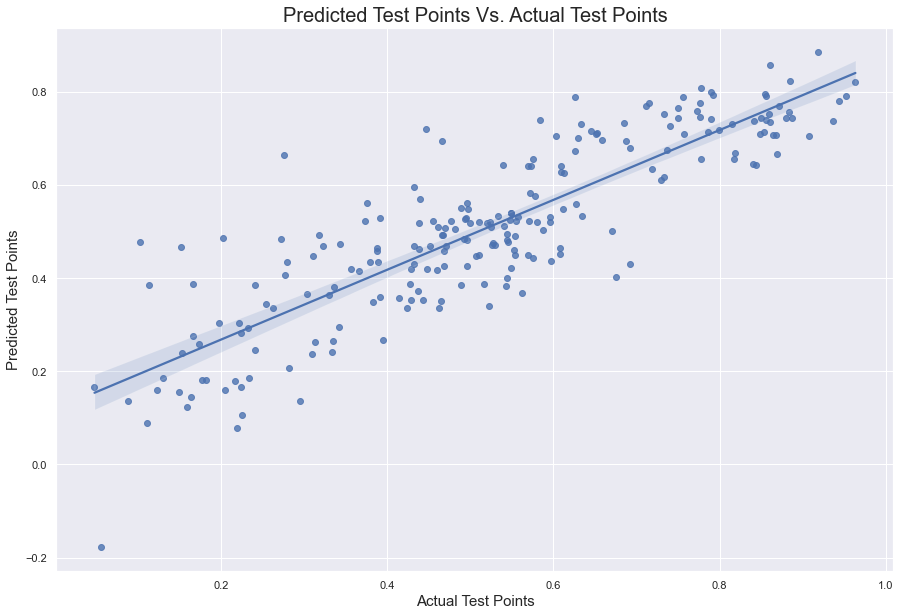

In [104]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Above Scatter Plot Shows Linear Relationship between Actual Test Data Points & Predicted Test Data Points

 # Generating R-Square

In [105]:
from sklearn.metrics import r2_score
r2 =r2_score(y_test, y_test_pred)
round(r2,4)

0.7417

In [106]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7007


# Comparision between Training and Testing dataset:


- Train dataset R^2          : 0.779
- Test dataset R^2           : 0.741
- Train dataset Adjusted R^2 : 0.774    
- Test dataset Adjusted R^2  : 0.700

Demand of bikes depend on windspeed, workingday, season_spring, season_summer, yr, season_winter, mnth_January,	weathersit_mist, weekday_saturday,  mnth_September, weathersit_light